In [1]:
import pickle

import torch
import torch.optim as optim

import matplotlib.pyplot as plt
import numpy as np

from image_colorization import *
from utils import *
from optim import *

%matplotlib inline

In [2]:
use_cuda = False
classification = True

In [3]:
image_list = get_images(n=10)

In [4]:
ab2cat = pickle.load(open('cache/ab2cat_10.pkl', 'rb'))
cat2ab = pickle.load(open('cache/cat2ab_10.pkl', 'rb'))
nearest_neighbors = pickle.load(open('cache/nearest_neighbors.pkl', 'rb'))
inv_distr = np.loadtxt('cache/class_weights.txt')

n_spaces = len(ab2cat)

In [5]:
preprocessor_class = lambda label: get_smoothed_label(label, nearest_neighbors, ab2cat)
preprocessor_reg = lambda label: label

preprocessor = preprocessor_class if classification else preprocessor_reg
dset = ColorizationDataset(image_list, preprocessor)
loader = data.DataLoader(dset, shuffle=True, batch_size=4)

In [6]:
n_outputs = n_spaces if classification else 2
model = ImageColorizer(n_outputs)
model.apply(weights_init)
optimizer = optim.RMSprop(model.parameters())

class_weights = torch.FloatTensor(inv_distr)

In [11]:
num_epochs = 100
if classification:
    model = train_model_class(model, optimizer, loader, class_weights, num_epochs=num_epochs, show_every=None)
else:
    model = train_model_reg(model, optimizer, loader, num_epochs=num_epochs, show_every=None)

Epoch 0
Average loss: 275.501118978
Epoch 1
Average loss: 247.327067057
Epoch 2
Average loss: 262.240748088
Epoch 3
Average loss: 289.196258545
Epoch 4
Average loss: 236.900355021
Epoch 5
Average loss: 255.549621582
Epoch 6
Average loss: 249.485707601
Epoch 7
Average loss: 304.812876383
Epoch 8
Average loss: 214.837051392
Epoch 9
Average loss: 251.103352865
Epoch 10
Average loss: 243.898427327
Epoch 11
Average loss: 249.951950073
Epoch 12
Average loss: 350.553049723
Epoch 13
Average loss: 523.051849365
Epoch 14
Average loss: 397.844238281
Epoch 15
Average loss: 243.173100789
Epoch 16
Average loss: 289.241566976
Epoch 17
Average loss: 214.277290344
Epoch 18
Average loss: 223.29800415
Epoch 19
Average loss: 226.823455811
Epoch 20
Average loss: 218.256591797
Epoch 21
Average loss: 226.176635742
Epoch 22
Average loss: 220.798456828
Epoch 23
Average loss: 201.044723511
Epoch 24
Average loss: 228.871124268
Epoch 25
Average loss: 236.777013143
Epoch 26
Average loss: 214.4469045
Epoch 27
Avera

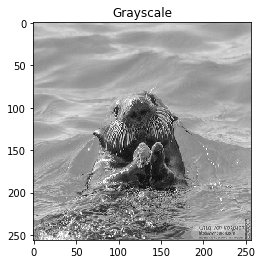

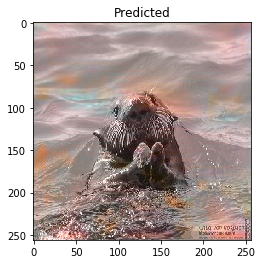

In [17]:
if classification:
    predict_class(model, dset, cat2ab)
else:
    predict_reg(model, dset)